In [1]:
library( ggplot2 )

In [70]:
df <- read.csv('../data/processed/diamonds.csv')
df.new <- read.csv('../data/processed/new-diamonds.csv')
str( df )

'data.frame':	50000 obs. of  8 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ carat      : num  0.51 2.25 0.7 0.47 0.3 0.33 2.01 0.51 1.7 0.53 ...
 $ cut        : Factor w/ 5 levels "Fair","Good",..: 4 1 5 2 3 3 5 3 4 4 ...
 $ cut_ord    : int  4 1 3 2 5 5 3 5 4 4 ...
 $ color      : Factor w/ 7 levels "D","E","F","G",..: 3 4 2 3 4 1 4 3 1 1 ...
 $ clarity    : Factor w/ 8 levels "I1","IF","SI1",..: 5 1 6 5 7 3 3 8 3 6 ...
 $ clarity_ord: int  4 1 5 4 7 3 3 6 3 5 ...
 $ price      : int  1749 7069 2757 1243 789 728 18398 2203 15100 1857 ...


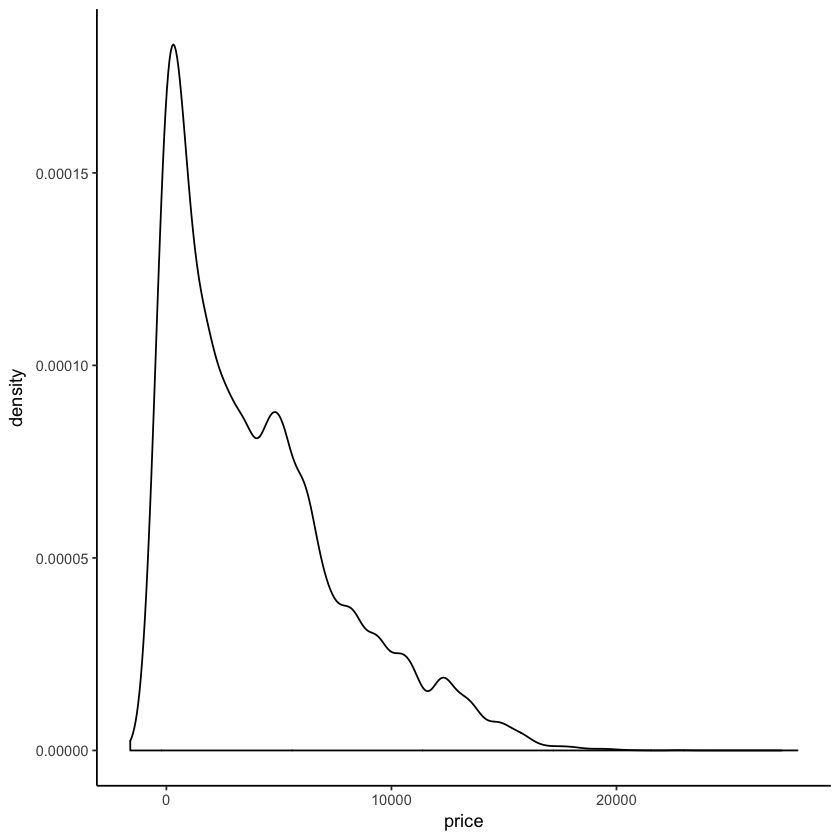

In [75]:
ggplot( df ) +
    geom_density( aes( x = price ) ) +
    theme_classic()

In [112]:
fit.lm <- glm( log( price )
            ~ clarity_ord
            + carat:clarity
             , data = df
             , family = gaussian() )

Warning message in log(price):
“NaNs produced”

In [113]:
summary( fit.lm )


Call:
glm(formula = log(price) ~ clarity_ord + carat:clarity, family = gaussian(), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7502  -0.2312   0.3082   0.4617   0.7546  

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.233626   0.022728  274.26   <2e-16 ***
clarity_ord       -0.114215   0.004806  -23.77   <2e-16 ***
carat:clarityI1    1.332527   0.023971   55.59   <2e-16 ***
carat:clarityIF    3.881007   0.042257   91.84   <2e-16 ***
carat:claritySI1   2.254669   0.012031  187.41   <2e-16 ***
carat:claritySI2   1.972617   0.012765  154.53   <2e-16 ***
carat:clarityVS1   2.563159   0.013678  187.39   <2e-16 ***
carat:clarityVS2   2.549506   0.011739  217.18   <2e-16 ***
carat:clarityVVS1  3.496694   0.031548  110.84   <2e-16 ***
carat:clarityVVS2  3.157609   0.021430  147.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family t

In [114]:
df.new$price <- exp( predict( fit.lm, newdata = df.new ) )

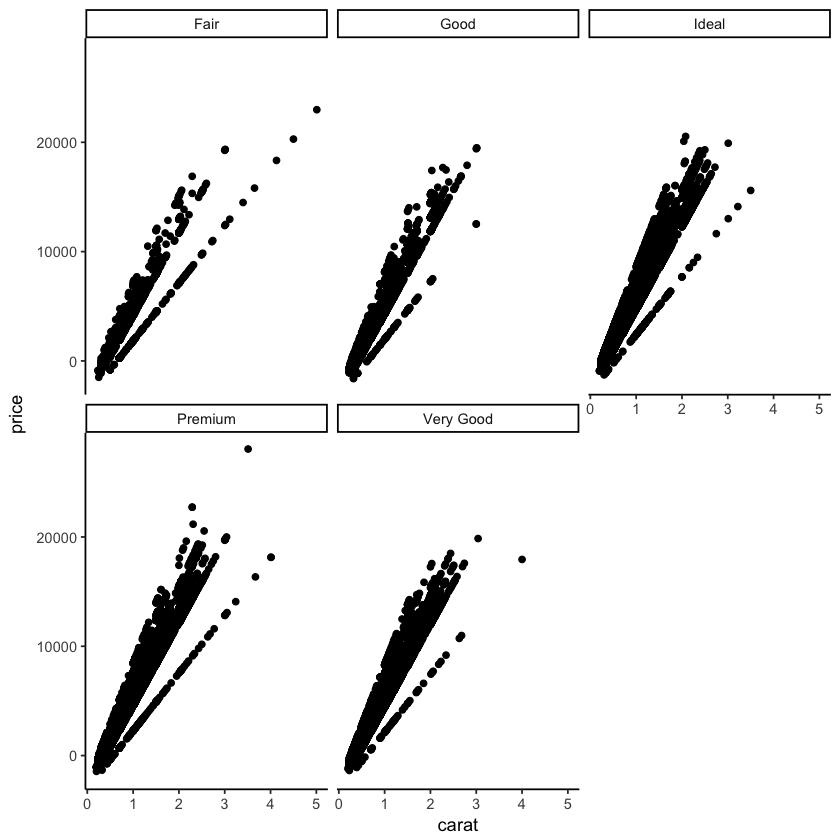

In [120]:
ggplot( df ) +
    geom_point( aes( x = carat, y = price ) ) +
    facet_wrap( ~cut ) +
    theme_classic()

Warning message:
“Ignoring unknown aesthetics: coulour”

List of 57
 $ line                 :List of 6
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                 :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ size         : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                 :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       :Classes 'margin', 'unit'  atomic [1:4] 0 0 0 0
  .. .. ..- attr(*, "valid.unit")= int 8
  .. .. ..- attr(*, "unit")= chr "pt"
  ..$ debug        : logi FALSE
  ..$ inherit.

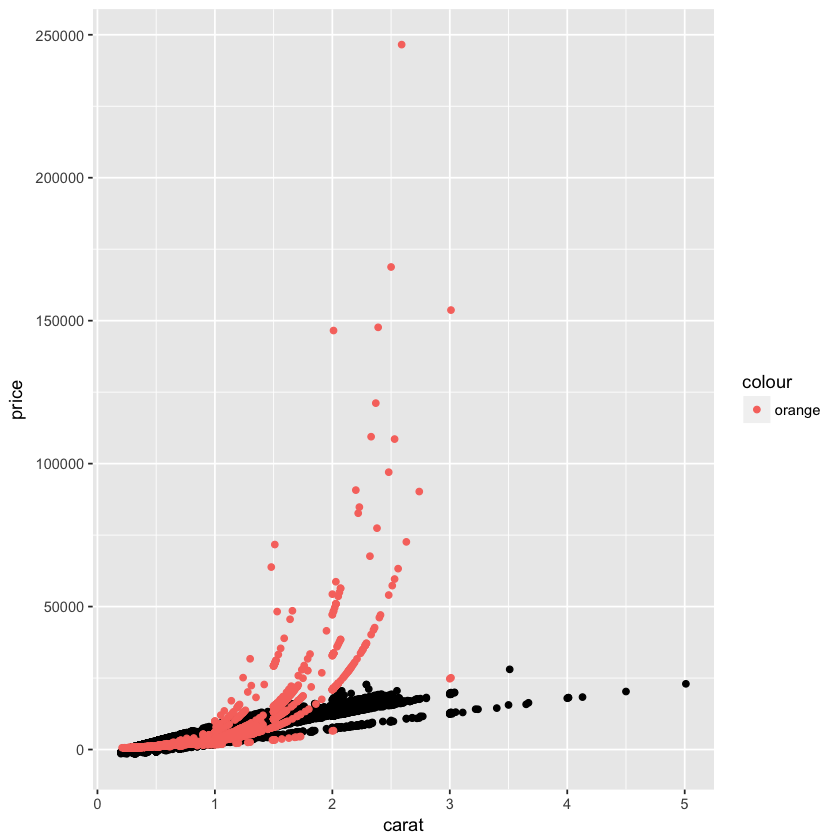

In [115]:
ggplot() +
    geom_point( data = df, aes( x = carat, y = price, coulour = 'blue' ) ) +
    geom_point( data = df.new, aes( x = carat, y = price, colour = 'orange' ))
    theme_classic()